In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
from astropy.io import ascii

from matplotlib.patches import Rectangle

FileNotFoundError: [Errno 2] No such file or directory: 'PS11aop_grid_e1+5h.csv'

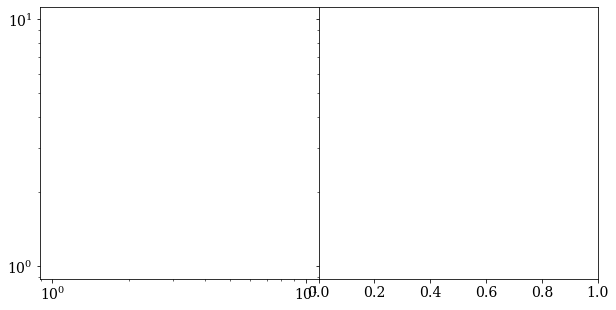

In [53]:
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
#figure, subplots = plt.subplots(1, 2, figsize=(18,10))
#figure.rcParams.update({'font.size': 10})
#fig = fig.add_subplot(111) 
fig,subplots = plt.subplots(1, 2,figsize=(10,5), sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

#### LEFT:

subplots[0].set_xscale('log')
subplots[0].set_yscale('log')

file_in = 'PS11aop_grid_e1+5h.csv'
data_plot = ascii.read(file_in)
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
z = 0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#

file_in1 = 'PS11aop_grid_e2+5h.csv'
data_plot1 = ascii.read(file_in1)
index1 = np.where(data_plot1['RuledOut'] == 'False')[0]
data_plot1a = data_plot[index1]

#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
index2a = np.where(data_plota['Radius'] < np.max(data_plot1a['Radius']))[0]
data_plota = data_plota[index2a]
index3a = np.where(data_plota['v_shock'] > np.min(data_plot1a['v_shock']))[0]
data_plota = data_plota[index3a]
#index4 = np.where(data_plot['Mdot'] > 0.85)[0]
#data_plot = data_plot[index4]
#index5 = np.where(data_plot['Mdot'] < 1.5)[0]
#data_plot = data_plot[index5]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(50),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed,high_precision = False)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    subplots[0].plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)

 #Not allowed
# indexb = np.where(data_plot['RuledOut'] == 'True')[0]
# data_plotb = data_plot[indexb]
# index2b = np.where(data_plotb['Radius'] < 7.5e16)[0]
# data_plotb = data_plotb[index2b]
# index3b = np.where(data_plotb['v_shock'] > 2500.)[0]
# data_plotb = data_plotb[index3b]
# #index4 = np.where(data_plot['Mdot'] > 0.85)[0]
# #data_plot = data_plot[index4]
# #index5 = np.where(data_plot['Mdot'] < 1.5)[0]
# #data_plot = data_plot[index5]

# Fcalc1 = data_plotb['F_peak'][0:300:20]
# nucalc1 = data_plotb['nu_peak'][0:300:20]
# nu_sed1=np.logspace(np.log10(0.1),np.log10(50),num=100)

# for i in range(len(Fcalc1)):
#     #calculate SSA
#     SSA_sed1 = F_nu(t_p,nucalc1[i],Fcalc1[i],nu_sed1)
    
#     #calculate Mass loss rate, Radius, velocity, etc.
#     R1,B1,E1,v1,M1 = SSA_props(t_p,nucalc1[i],Fcalc1[i],D)

#     #calculate tau_ff
#     tauff1 = taufreefree(M1,R1,nu_sed1)
        
#     #Correct SED for FFA:
#     SSA_FFA_sed1 = SSA_sed1*np.exp(-tauff1)
    
#     #Plot it:
#     subplots[0].plot(nu_sed1,SSA_FFA_sed1,'r',zorder=1,alpha=0.5)
    
#Overplot the data:
subplots[0].errorbar(9.77,0.0405,0.0078,fmt ='o',color='xkcd:turquoise',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
#subplots[0].text(1.1,0.04,'Allowed',color = 'b',fontsize=15,bbox={'facecolor': 'b', 'alpha': 0.2, 'pad': 5})
#subplots[0].text(1.1,0.03,'Not Allowed',color='r',fontsize=15,bbox={'facecolor': 'r', 'alpha': 0.2, 'pad': 5})
r1e = Rectangle((1,5e-3),1,0.095,color='coral',alpha=0.1,zorder=1)
r2e = Rectangle((2,5e-3),2,0.095,color='khaki',alpha=0.1,zorder=1)
r3e = Rectangle((4,5e-3),4,0.095,color='lightgreen',alpha=0.1,zorder=1)
r4e = Rectangle((8,5e-3),4,0.095,color='xkcd:turquoise',alpha=0.1,zorder=1)
r5e = Rectangle((12,5e-3),6,0.095,color='xkcd:olive',alpha=0.1,zorder=1)
subplots[0].add_patch(r1e)
subplots[0].add_patch(r2e)
subplots[0].add_patch(r3e)
subplots[0].add_patch(r4e)
subplots[0].add_patch(r5e)


subplots[0,0].xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
subplots[0].set_ylabel('Flux (mJy)', fontsize=20) 
#subplots[0].title.set_text('PS1-11aop 2015B Observations')   
subplots[0].title.set_fontsize(16) 
subplots[0].set_ylim(8e-3,1e-1)
subplots[0].set_xlim(1,18)
subplots[0].text(8,0.08,'t = 1266 d',fontsize=12,fontweight='bold',bbox={'facecolor': 'k', 'alpha': 0.2, 'pad': 10})
subplots[0].text(1.2,0.065,r'$v_{sh} = 2.963-6.802\times 10^3$ km s$^{-1}$',fontsize=11,fontweight='bold')
subplots[0].text(1.2,0.05,r'$\.{M} = 5.5-25.3\times 10^{-4}$ M$_{\odot}$ yr$^{-1}$',fontsize=11,fontweight='bold')
subplots[0].text(1.2,0.08,r'$R = 3.24-7.44\times 10^{16}$ cm',fontsize=11,fontweight='bold')

#constrained epoch 1 for -5.5 days, max v =6802.2508770775,min=2963, min r =3.2412241536982116e+16
#max r =7.440657640837382e+16, max Mdot = 25.3 , min Mdot = 5.5

####RIGHT:

subplots[1].set_xscale('log')
subplots[1].set_yscale('log')


D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_in2 = 'PS11aop_grid_e2+5h.csv'
data_plot = ascii.read(file_in2)


#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(50),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed,high_precision = False)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    subplots[1].plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)

 #Not allowed
# indexb = np.where(data_plot['RuledOut'] == 'True')[0]
# data_plotb = data_plot[indexb]

# Fcalc1 = data_plotb['F_peak'][0:1800:44]
# nucalc1 = data_plotb['nu_peak'][0:1800:44]
# nu_sed1=np.logspace(np.log10(0.1),np.log10(50),num=100)

# for i in range(len(Fcalc1)):
#     #calculate SSA
#     SSA_sed1 = F_nu(t_p,nucalc1[i],Fcalc1[i],nu_sed1)
    
#     #calculate Mass loss rate, Radius, velocity, etc.
#     R1,B1,E1,v1,M1 = SSA_props(t_p,nucalc1[i],Fcalc1[i],D)

#     #calculate tau_ff
#     tauff1 = taufreefree(M1,R1,nu_sed1)
        
#     #Correct SED for FFA:
#     SSA_FFA_sed1 = SSA_sed1*np.exp(-tauff1)
    
#     #Plot it:
#     subplots[1].plot(nu_sed1,SSA_FFA_sed1,'r',zorder=1,alpha=0.5)
#Overplot the data:
#plt.plot(3.0,0.405, 'kv', markersize=10)
subplots[1].errorbar(6.0,0.0318,0.0095,fmt ='o',color='lightgreen',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
subplots[1].plot(9.02,0.0258, 'v',color='xkcd:turquoise',markersize=12,markeredgecolor='k',markeredgewidth=2)
subplots[1].errorbar(14.74,0.0155, 0.0056,fmt='o',color='xkcd:olive',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#, markersize=10)


r1d = Rectangle((1,5e-3),1,0.095,color='coral',alpha=0.1,zorder=1)
r2d = Rectangle((2,5e-3),2,0.095,color='khaki',alpha=0.1,zorder=1)
r3d = Rectangle((4,5e-3),4,0.095,color='lightgreen',alpha=0.1,zorder=1)
r4d = Rectangle((8,5e-3),4,0.095,color='xkcd:turquoise',alpha=0.1,zorder=1)
r5d = Rectangle((12,5e-3),6,0.095,color='xkcd:olive',alpha=0.1,zorder=1)
subplots[1].add_patch(r1d)
subplots[1].add_patch(r2d)
subplots[1].add_patch(r3d)
subplots[1].add_patch(r4d)
subplots[1].add_patch(r5d)


#subplots[1].set_xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
#subplots[0,1].set_ylabel('Flux (mJy)', fontsize=20) 
#subplots[1].title.set_text('PS1-11aop 2017A Observations') 
subplots[1].title.set_fontsize(16) 
subplots[1].set_ylim(8e-3,1e-1)
subplots[1].set_xlim(1,18)
subplots[1].text(7.8,0.08,'t = 1695 d',fontsize=12,fontweight='bold',bbox={'facecolor': 'k', 'alpha': 0.2, 'pad': 10})
subplots[1].text(1.2,0.08,r'$R = 4.33-7.55\times 10^{16}$ cm',fontsize=11,fontweight='bold')
subplots[1].text(1.2,0.06,r'$v_{sh} = 2.955-5.156\times 10^3$ km s$^{-1}$',fontsize=11,fontweight='bold')
subplots[1].text(1.2,0.045,r'$\.{M} = 6.29-10.19\times 10^{-4}$ M$_{\odot}$ yr$^{-1}$',fontsize=11,fontweight='bold')

#epoch 2 for 5.5days , min v =2955.653628454705,max v=5156.192888770475, min R =4.3289282514104936e+16
# max R =7.551896085195307e+16, min Mdot = 6.29, max Mdot = 10.19

#fig.text(0.5, 0.03,r'$\nu$(GHz)',fontsize=20, va='center',ha ='center')

#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.tight_layout()
#plt.savefig('SEDps11aop5.png',dpi = 500, transparent = True)
#plt.show()

In [54]:
#1 Jy = 10^-23 erg s-1 cm-2 Hz-1
#7.253971512072e16 #0.3keV in Freq
#2.417990504024e+18  #10keV in Freq
#1.208995252012e18 #5keV in freq
#10**(-23)
#4.23*1e-15 #erg s-1 cm-2 
xflux_Jy = (4.23*1e-15)/(1.208995252012e18*1e-23) # = 3.498773045601684e-10 Jy
xflux_mJy = xflux_Jy/1e-3
xflux_mJy
freq = 1.208995252012e18 #Hz
freqG = freq/1e9
freqG
xflux_mJy

3.4987730456016837e-07

FileNotFoundError: [Errno 2] No such file or directory: 'PS11aop_grid_e1+5h.csv'

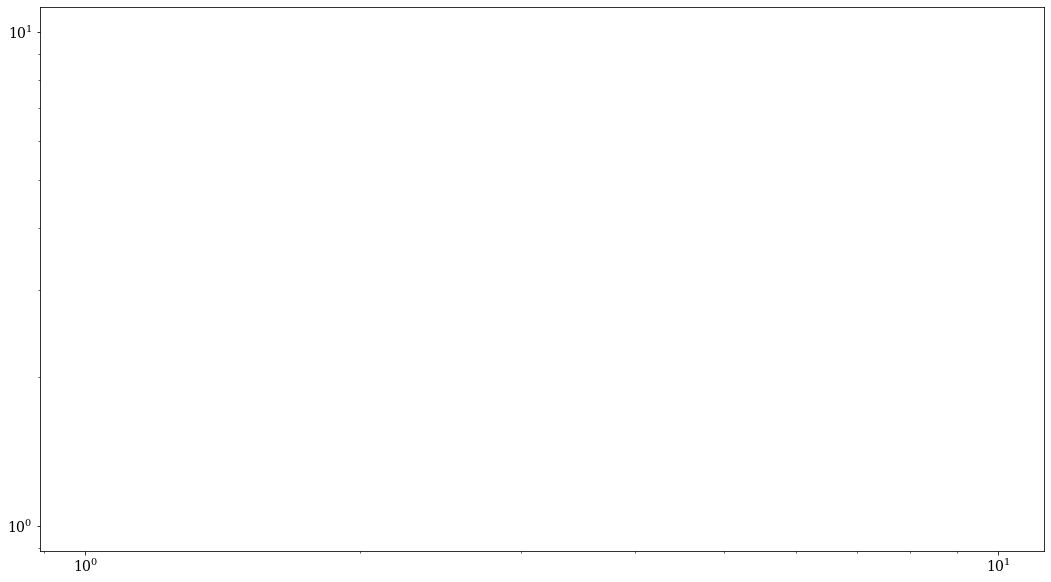

In [55]:
from decimal import *
getcontext().prec = 50 #45

#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
fig, ax = plt.subplots(figsize=(18,10)) 
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
#figure, subplots = plt.subplots(1, 2, figsize=(18,10))
#figure.rcParams.update({'font.size': 10})
#fig = fig.add_subplot(111) 
#fig,subplots = plt.subplots(1, 1,figsize=(10,5), sharex='col', sharey='row',
 #                       gridspec_kw={'hspace': 0, 'wspace': 0})

#### LEFT:

plt.xscale('log')
plt.yscale('log')

file_in = 'PS11aop_grid_e1+5h.csv'
data_plot = ascii.read(file_in)
D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57307.08 # date that radio obs was taken
redshift = 0.218 # redshift of object
z = 0.218
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#

file_in1 = 'PS11aop_grid_e2+5h.csv'
data_plot1 = ascii.read(file_in1)
index1 = np.where(data_plot1['RuledOut'] == 'False')[0]
data_plot1a = data_plot[index1]

#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]
index2a = np.where(data_plota['Radius'] < np.max(data_plot1a['Radius']))[0]
data_plota = data_plota[index2a]
index3a = np.where(data_plota['v_shock'] > np.min(data_plot1a['v_shock']))[0]
data_plota = data_plota[index3a]
#index4 = np.where(data_plot['Mdot'] > 0.85)[0]
#data_plot = data_plot[index4]
#index5 = np.where(data_plot['Mdot'] < 1.5)[0]
#data_plot = data_plot[index5]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(1e10),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed,high_precision = True)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    plt.plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)


    
#Overplot the data:
plt.errorbar(9.77,0.0405,0.0078,fmt ='o',color='xkcd:turquoise',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
#plt.plot(1208995252,3.498773045601684*10**(-13),'o',color='red',markersize=12)#,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
#
#subplots[0].text(1.1,0.04,'Allowed',color = 'b',fontsize=15,bbox={'facecolor': 'b', 'alpha': 0.2, 'pad': 5})
#subplots[0].text(1.1,0.03,'Not Allowed',color='r',fontsize=15,bbox={'facecolor': 'r', 'alpha': 0.2, 'pad': 5})
r1e = Rectangle((1,5e-3),1,0.095,color='coral',alpha=0.1,zorder=1)
r2e = Rectangle((2,5e-3),2,0.095,color='khaki',alpha=0.1,zorder=1)
r3e = Rectangle((4,5e-3),4,0.095,color='lightgreen',alpha=0.1,zorder=1)
r4e = Rectangle((8,5e-3),4,0.095,color='xkcd:turquoise',alpha=0.1,zorder=1)
r5e = Rectangle((12,5e-3),6,0.095,color='xkcd:olive',alpha=0.1,zorder=1)
#ax.add_patch(r1e)
#ax.add_patch(r2e)
#ax.add_patch(r3e)
#ax.add_patch(r4e)
#ax.add_patch(r5e)


plt.xlabel(r'$\nu$ (GHz)', fontsize=20) #Log$_{10}$ t$_{rest}$(days)($\u03BD$ /5 GHz)', fontsize=14)
plt.ylabel('Flux (mJy)', fontsize=20) 
#subplots[0].title.set_text('PS1-11aop 2015B Observations')   
#plt.title.set_fontsize(16) 



D_L = 1070.1 # distance to SN in Mpc
date_expl =  55770.562 - 5.5 #55736.161 #inferred explosion date
date_obs = 57829.76513 # date that radio obs was taken
redshift = 0.218 # redshift of object
t_p = (date_obs - date_expl)/(1+redshift) # time of observation in days #1261.509031#
file_in2 = 'PS11aop_grid_e2+5h.csv'
data_plot = ascii.read(file_in2)


#Allowed
indexa = np.where(data_plot['RuledOut'] == 'False')[0]
data_plota = data_plot[indexa]

Fcalc = data_plota['F_peak'][0:10]
nucalc = data_plota['nu_peak'][0:10]
nu_sed=np.logspace(np.log10(0.1),np.log10(1e10),num=100)

###Cycle over the SEDs to show######
for i in range(len(Fcalc)):
    #calculate SSA
    SSA_sed = F_nu(t_p,nucalc[i],Fcalc[i],nu_sed,high_precision = True)
    
    #calculate Mass loss rate, Radius, velocity, etc.
    R,B,E,v,M = SSA_props(t_p,nucalc[i],Fcalc[i],D_L)

    #calculate tau_ff
    tauff = taufreefree(M,R,nu_sed)
        
    #Correct SED for FFA:
    SSA_FFA_sed = SSA_sed*np.exp(-tauff)
    
    #Plot it:
    plt.plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)


plt.errorbar(6.0,0.0318,0.0095,fmt ='o',color='lightgreen',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#'ro', markersize=10)
plt.plot(9.02,0.0258, 'v',color='xkcd:turquoise',markersize=12,markeredgecolor='k',markeredgewidth=2)
plt.errorbar(14.74,0.0155, 0.0056,fmt='o',color='xkcd:olive',markersize=12,elinewidth=4,markeredgecolor='k',markeredgewidth=2)#, markersize=10)
plt.plot(1208995252.012,3.4987730456016837e-07,'*',color = 'orange',markersize=15,markeredgecolor='k',markeredgewidth=2)
plt.plot(1208995252.012,401999999*1e-3,'*',color = 'red',markersize=15,markeredgecolor='k',markeredgewidth=2)
plt.ylim(1e-14,1e-1)
plt.xlim(-10,1e10)
plt.savefig('test1.png')

In [105]:
#X-ray to optical flux ratio

magr = 19.08  #r-band host galaxy 
zpt = 3631  #for r-band 
flux_Jy = zpt*10**(-0.4*magr)
#fr = 10**(-5.5-(0.4*magr)) #ergs/s
fr = flux_Jy*1e-23*4.914e14
fx = 4.23e-15 #ergs/s/cm^2
r = fx/fr
# optical flux is higher than x-ray
np.log10(r)

-1.9931210336819123

In [102]:
xo = np.log10(fx) + (0.4*magr) + 5.71 #X-ray to optical flux ratio
xo

-1.0316596326249572

In [104]:
#calculate spectra index = alpha, (flux1/flux2) = (nu1/nu2)^a-----> a = log(flux1/flux2)/log(nu1/nu2)
flux1 = 0.0318 #mJy
flux2 = 0.0155  #mJy
nu1 = 6 #GHz
nu2 = 14.74 #GHz
a = np.log10(flux1/flux2)/np.log10(nu1/nu2)
a

-0.7995348624324878

In [109]:
0.0155-0.0027

0.012799999999999999

In [95]:
#X-ray Luminosity
f_p = 4.23e-15  #erg /s/cm^2
dl = 1070.1
z = 0.218
lum = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
lum

4.75992185322704e+41

In [110]:
mL = 1e42*(1 + z)**2.7
mL

1.70312952726538e+42

In [108]:
#SFR from H_alpha
f_p = 1.342e-15 #erg /s/cm^2/Hz
dl = 1070.1
z = 0.218
lum = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
lum
sfr = 7.9e-42*lum
lum
sfr

1.1929962057575045

In [7]:
#for the non-thermal
lum_der = (sfr/6.64e-29*(6)**0.799)
flux_der = ((lum_der*(1+z))/(4*3.142*(dl*3.086e+24)**2))/(1e-3*1e-23)
flux_der

1.1029983084067483

In [6]:
#for the thermal
lum_der = (sfr/4.6e-28*1**(-0.45)*6**(0.1))
flux_der = ((lum_der*(1+z))/(4*3.142*(dl*3.086e+24)**2))/(1e-3*1e-23)
flux_der

0.045504816779147125

In [3]:
#SFR from Radio peak

f_p = 0.0318*1e-3*1e-23 #Jy
dl = 1070.1
z = 0.218
lum = 4*3.142*(dl*3.086e+24)**2*f_p/(1+z)
lum
#sfr = 5.5e-29*lum # at 1.4 GHz
#sfr = 4.3e-28*lum #free free absorption at 5GHz
sfr = 4.6e-28*1**(-0.45)*6**(0.1)*lum  #thermal radio 
sfr

19.6906263925753

In [8]:
#non-thermal SFR

sfr2 = 6.64e-29*(6)**0.799*lum
sfr2

9.944833209375762

In [43]:
p = 3
m = 0.88 #using stAandard model m = (n-3)/(n-2)
p = 3.0 #using standard model
a = (2*m)+0.5
b = (p+5-(6*m))/2
t=t_p
#SSA_sed
'''
    m = 0.88 #using stAandard model m = (n-3)/(n-2)
    p = 3.0 #using standard model
    a = (2*m)+0.5
    b = (p+5-(6*m))/2
    t=t_p
    Fnu = F_nup*1.582*(t/t_p)**a*(nu_sed/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu_sed/nu_p)**(-(p+4)/2)))
    
    return Fnu
'''
#1-np.float64(np.exp(-(t/t_p)**(-(a+b)) * (nu_sed/nucalc[-1])**(-(p+4)/2)))   
#1.0-np.exp(-(t/t_p)**(-(a+b)) * (nu_sed/nucalc[-1])**(-(p+4)/2)) # remove 1, add 1.0, 

'\n    m = 0.88 #using stAandard model m = (n-3)/(n-2)\n    p = 3.0 #using standard model\n    a = (2*m)+0.5\n    b = (p+5-(6*m))/2\n    t=t_p\n    Fnu = F_nup*1.582*(t/t_p)**a*(nu_sed/nu_p)**(5/2)*(1-np.exp(-(t/t_p)**(-(a+b))*(nu_sed/nu_p)**(-(p+4)/2)))\n    \n    return Fnu\n'

In [42]:
#nucalc[-1] = 3.953021605453848  #-nu_p
#Fcalc[-1] = 0.03906939937054617  F_p
#t_p = (date_obs - date_expl)/(1+redshift) =1695.1585632183921

<ipython-input-46-5254ba4007b7>:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-10,1e10)


2.0479107489261381e-10


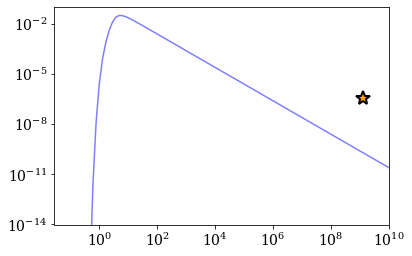

In [46]:
from decimal import *
getcontext().prec = 50 #45
plt.xscale('log')
plt.yscale('log')

Fcalc = data_plota['F_peak'][-1]
nucalc = data_plota['nu_peak'][-1]
nu_sed=np.logspace(np.log10(0.1),np.log10(1e10),num=100) 

#calculate SSA
SSA_sed = F_nu(t_p,nucalc,Fcalc,nu_sed,high_precision = True)

#calculate Mass loss rate, Radius, velocity, etc.
R,B,E,v,M = SSA_props(t_p,nucalc,Fcalc,D_L)

#calculate tau_ff
tauff = taufreefree(M,R,nu_sed)

#Correct SED for FFA:
SSA_FFA_sed = SSA_sed*np.exp(-tauff)

#Plot it:
plt.plot(nu_sed,SSA_FFA_sed,'b',zorder=1,alpha=0.5)   
result = np.interp(1208995252.012,nu_sed,SSA_FFA_sed)
plt.plot(1208995252.012,3.4987730456016837e-07,'*',color = 'orange',markersize=15,markeredgecolor='k',markeredgewidth=2)
plt.ylim(1e-14,1e-1)
plt.xlim(-10,1e10)
print (result)



In [45]:
#synch_flux_mJy/Xflux_mJy [times 100%]
(2.0479107489261381e-10/3.4987730456016837e-07)*100

0.058532254657116776

In [2]:
from astropy.wcs import WCS
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LogNorm

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


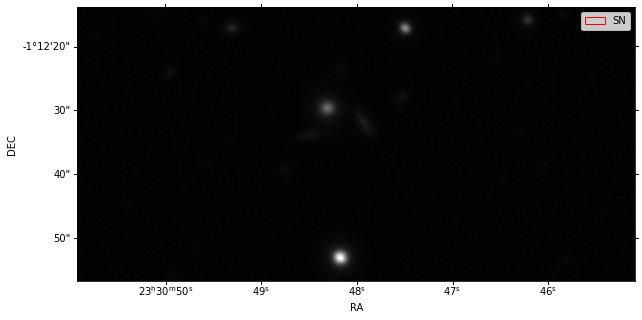

In [3]:
from matplotlib.patches import Ellipse
image_file = "../PS11aop-host/PS11aop.i.sub.fits"  
#hdu_list = fits.open(image_file)
#hdu_list.info()
#image_data = hdu_list[0].data
image_data = fits.getdata(image_file)
w = WCS("../PS11aop-host/cutout_rings.v3.skycell.1320.063.stk.i.unconv.fits")
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=w)
plt.imshow(image_data,cmap='gray', norm=LogNorm(),aspect='equal')

#ca = Circle((352.7038,-1.207386), radius=10,transform=ax.get_transform('icrs'), edgecolor='white',linestyle='--', facecolor='none',label='SN')
#ax.add_patch(ca)
ellipsed = Ellipse(xy=(352.7038,-1.207386), width=0.05*2, height=0.05*2, angle=0,edgecolor='red', facecolor='none',transform=ax.get_transform('icrs'),label = 'SN')
ax.add_patch(ellipsed)

plt.legend()
#plt.grid(color='white', ls=':')
plt.xlabel('RA')
plt.ylabel('DEC')



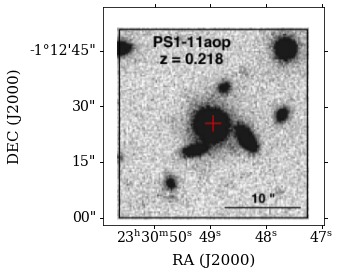

In [22]:
# Get an example image
import matplotlib.cbook as cbook
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 15})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

image_file = ('/Users/adaezeibik/Downloads/ps11aop.png')
img = plt.imread(image_file)
ax = plt.subplot(projection=w)
#fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(img)
plt.gca().invert_yaxis()
plt.xlabel('RA (J2000)')
plt.ylabel('DEC (J2000)')
plt.savefig('ps1-host.png',bbox_inches='tight',dpi = 500, transparent = True)
#plt.show()

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
No handles with labels found to put in legend.


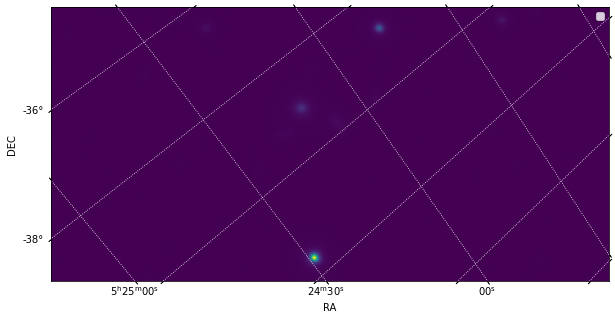

In [3]:

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('../PS11aop-host/PS11aop.z.sub.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)
fig = plt.figure(figsize=(10, 10))
plt.subplot(projection=wcs)
plt.imshow(hdu.data, origin='lower')

ca = Circle((352.7038,-1.207386), radius=10,transform=ax.get_transform('icrs'), edgecolor='white',linestyle='--', facecolor='none',label='SN')
ax.add_patch(ca)
plt.legend()
plt.grid(color='white', ls=':')
plt.xlabel('RA')
plt.ylabel('DEC')